### Importing the Libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [2]:
tf.__version__ 

'2.9.1'

### Part 1 - Data Preprocessing

#### Generating images for the Training set

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

#### Generating images for the Test set

In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)

### Creating the Training set

In [5]:
training_set = train_datagen.flow_from_directory('D:/Paper Research Method_Code/asl-dataset/train',                                
                                                 target_size = (128, 128),
                                                 batch_size = 10,
                                                 color_mode = 'grayscale',                                
                                                 class_mode = 'categorical')

Found 30526 images belonging to 27 classes.


In [6]:
test_set = test_datagen.flow_from_directory('D:/Paper Research Method_Code/asl-dataset/val',
                                            target_size = (128, 128),                                  
                                            batch_size = 10,        
                                            color_mode = 'grayscale',
                                            class_mode = 'categorical')

Found 8958 images belonging to 27 classes.


### Part 2 - Building the CNN

#### Initializing the CNN

In [7]:
classifier = tf.keras.models.Sequential()

#### Step 1 - Convolution

In [8]:
classifier.add(tf.keras.layers.Conv2D(filters=32,
                                     kernel_size=3, 
                                     padding="same", 
                                     activation="relu", 
                                     input_shape=[128, 128, 1]))

#### Step 2 - Pooling

In [9]:
classifier.add(tf.keras.layers.MaxPool2D(pool_size=2, 
                                         strides=2, 
                                         padding='valid'))

#### Adding a second convolutional layer

In [10]:
classifier.add(tf.keras.layers.Conv2D(filters=32, 
                                      kernel_size=3, 
                                      padding="same", 
                                      activation="relu"))

classifier.add(tf.keras.layers.MaxPool2D(pool_size=2, 
                                         strides=2, 
                                         padding='valid'))

#### Step 3 - Flattening

In [11]:
classifier.add(tf.keras.layers.Flatten())

#### Step 4 - Full Connection

In [12]:
classifier.add(tf.keras.layers.Dense(units=128, 
                                     activation='relu'))
classifier.add(tf.keras.layers.Dropout(0.40))
classifier.add(tf.keras.layers.Dense(units=96, activation='relu'))
classifier.add(tf.keras.layers.Dropout(0.40))
classifier.add(tf.keras.layers.Dense(units=64, activation='relu'))
classifier.add(tf.keras.layers.Dense(units=27, activation='softmax')) # softmax for more than 2

### Part 3 - Training the CNN

#### Compiling the CNN

In [13]:
classifier.compile(optimizer = 'adam', 
                   loss = 'categorical_crossentropy', 
                   metrics = ['accuracy'])

#### Training the CNN on the Training set and evaluating it on the Test set

In [14]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 128)               4

In [15]:
# history = classifier.fit(training_set,
#                   epochs = 15,
#                   validation_data = test_set)

In [16]:
history = classifier.fit(training_set,
                  epochs = 20,
                  validation_data = test_set)

Epoch 1/20
3053/3053 [==============================] - 2007s 657ms/step - loss: 2.5241 - accuracy: 0.2277 - val_loss: 1.2778 - val_accuracy: 0.5948
Epoch 2/20
3053/3053 [==============================] - 1256s 411ms/step - loss: 1.2885 - accuracy: 0.5839 - val_loss: 0.5938 - val_accuracy: 0.8251
Epoch 3/20
3053/3053 [==============================] - 1188s 389ms/step - loss: 0.9457 - accuracy: 0.6982 - val_loss: 0.3361 - val_accuracy: 0.9134
Epoch 4/20
3053/3053 [==============================] - 1357s 444ms/step - loss: 0.7806 - accuracy: 0.7536 - val_loss: 0.2510 - val_accuracy: 0.9282
Epoch 5/20
3053/3053 [==============================] - 1027s 336ms/step - loss: 0.6939 - accuracy: 0.7825 - val_loss: 0.1690 - val_accuracy: 0.9558
Epoch 6/20
3053/3053 [==============================] - 876s 287ms/step - loss: 0.6138 - accuracy: 0.8067 - val_loss: 0.1371 - val_accuracy: 0.9647
Epoch 7/20
3053/3053 [==============================] - 764s 250ms/step - loss: 0.5717 - accuracy: 0.8230 -

#### Saving the Model

In [17]:
model_json = classifier.to_json()
with open("model_new.json", "w") as json_file:
    json_file.write(model_json)
print('Model Saved')
classifier.save_weights('model_new.h5')
print('Weights saved')

Model Saved
Weights saved


In [18]:
import matplotlib.pyplot as plt

In [ ]:
# !pip install matplotlib

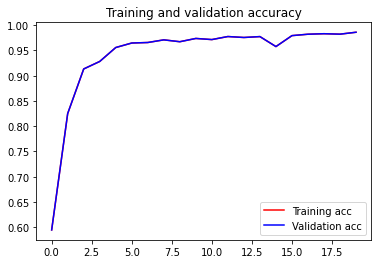

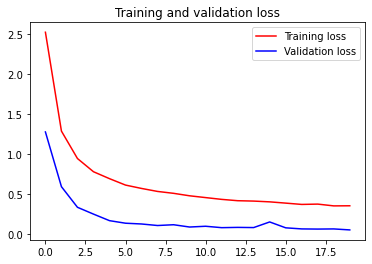

In [19]:

acc = history.history['val_accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r-', label='Training acc')
plt.plot(epochs, val_acc, 'b-', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r-', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import numpy as np
import itertools

In [32]:
test_batch = test_datagen.flow_from_directory('D:/Paper Research Method_Code/asl-dataset/val',
                                            target_size = (128, 128),                                  
                                            batch_size = 10,
                                            shuffle=False,  
                                            color_mode = 'grayscale',
                                            class_mode = 'categorical')

Found 8958 images belonging to 27 classes.


In [33]:
# y_pred = classifier.predict(test_batch, verbose=2) 

# confusion = tf.math.confusion_matrix(
#               labels = np.argmax(test_batch, axis=1),
#               predictions = np.argmax(y_pred, axis=1), 
#               num_classes=test_batch.classes)  # no. of classifier   

# print(confusion)


In [34]:
test_label = test_batch.classes
predictions = classifier.predict(x=test_batch,verbose = 0)

In [35]:
y_true = test_label
y_pred = predictions.argmax(axis=1)

cm = confusion_matrix(y_true, y_pred)

In [36]:
def plot_confusion_matrix(cm, classes,
 normalize=False,
 title='Confusion matrix',
 cmap=plt.cm.Blues):


 plt.imshow(cm, interpolation='nearest', cmap=cmap)
 plt.title(title)
 plt.colorbar()
 tick_marks = np.arange(len(classes))
 plt.xticks(tick_marks, classes, rotation=45)
 plt.yticks(tick_marks, classes)

 if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
 else:
    print('Confusion matrix, without normalization')

 print(cm)

 thresh = cm.max() / 2.
 
 for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")
        
 plt.tight_layout()
 plt.ylabel('True label')
 plt.xlabel('Predicted label')


In [37]:
# class_labels = test_batch.class_indices
# class_labels = {v: k for k, v in class_labels.items()}
# classes = list(class_labels.values())


# nb_validation_samples = 4268
# batch_size = 26
# #Confution Matrix and Classification Report
# Y_pred = classifier.predict_generator(test_batch, nb_validation_samples // batch_size+1)
# y_pred = np.argmax(Y_pred, axis=1)

# # print('Confusion Matrix')
# # print(confusion_matrix(test_batch.classes, y_pred))
# print("\n\n")
# print('Classification Report\n')
# target_names = list(class_labels.values())
# # print(classification_report(test_batch.classes, y_pred, target_names=target_names))

In [38]:
# def plot_confusion_matrix(cm, classes,
#                           title='Confusion matrix',
#                           cmap=plt.cm.Blues):
#     """
#     This function prints and plots the confusion matrix.
#     """
#     plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title)
#     plt.colorbar()
#     tick_marks = np.arange(len(classes))
#     plt.xticks(tick_marks, classes, rotation=45)
#     plt.yticks(tick_marks, classes)

#     print(cm)

#     thresh = cm.max() / 2.
#     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#         plt.text(j, i, cm[i, j],
#                  horizontalalignment="center",
#                  color="white" if cm[i, j] > thresh else "black")

#     plt.tight_layout()
#     plt.ylabel('True label')
#     plt.xlabel('Predicted label')

In [39]:
# cm = confusion_matrix(test_batch.classes, y_pred)
# np.set_printoptions(precision=2)

In [40]:
# plt.figure(figsize=(7,7))
# plot_confusion_matrix(cm, classes=target_names,
#                       title='Confusion matrix, without normalization')

Confusion matrix, without normalization
[[465   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0 299   0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0
    0   1   2   0   1   0   0   0   0]
 [  0   0 328   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   1   0   0   0   0   0]
 [  0   0   0 287   0   0   0   0   0   0   0   0   0   0   0   1   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 385   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 378   0   0   0   0   0   0   0   1   0   0   0   0
    0   2   0   1   0   0   0   0   0]
 [  0   0   0   1   0   0 380   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   1   0   0   0   0]
 [  0   0   0   1   0   0   0 180   1   0   0   0   0   0   0   1   1   0
    0   1   0   0   0   0   0   0   1]
 [  0   0   0   0   0   0   0   0 334   0   0   0   0   

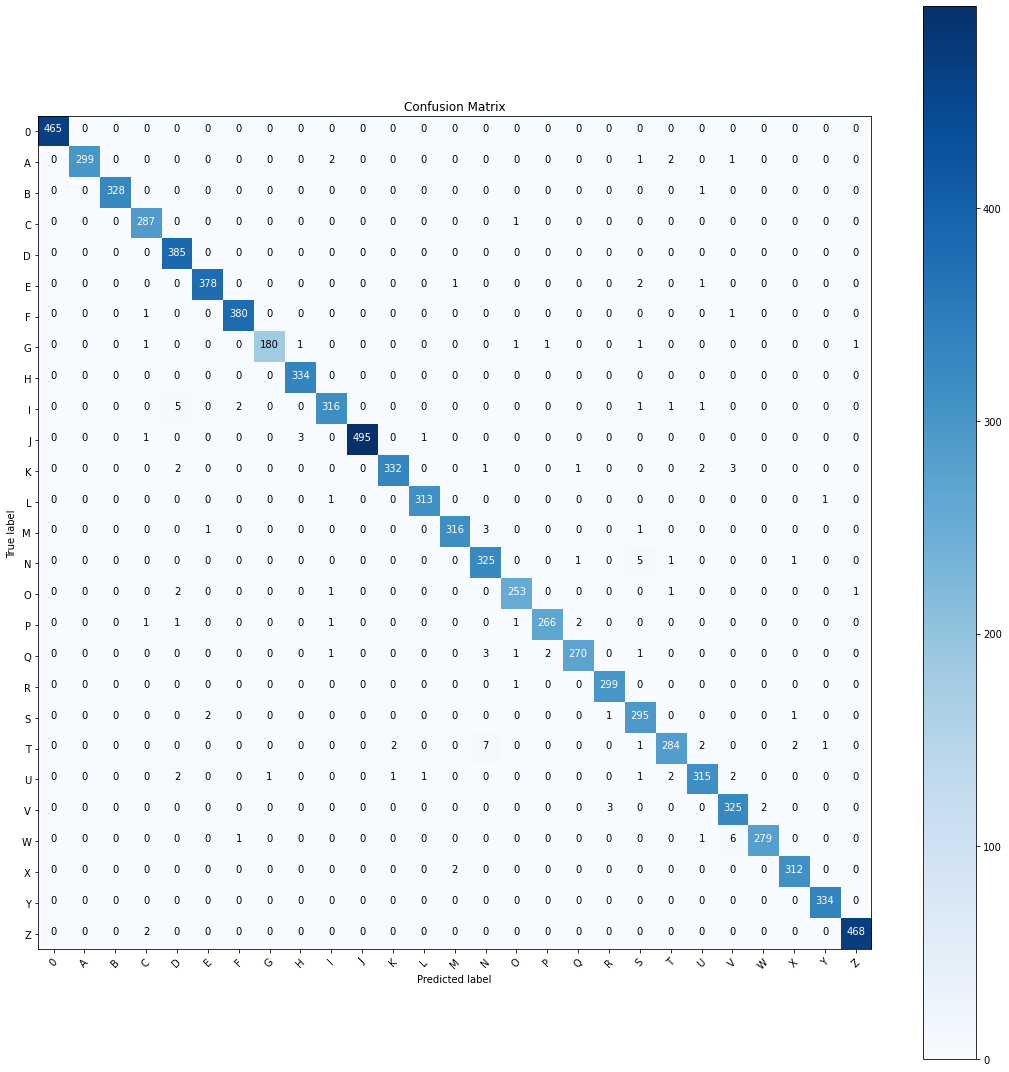

In [41]:
plt.figure(figsize = (15,15))

cm_plot_labels=['0','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels,title='Confusion Matrix')


In [42]:
accuracy_score(y_true,y_pred)

0.9860459924090199